# Load dataset

**record name , balanced sample**
- record 04015 -> 400
- record 04043 -> 1000
- record 04048 -> 900
- record 04908 -> tidak bisa di split karena hanya AF
- record 04936 -> 2000
- record 05091 -> 1000, class 0 29
- record 05121 -> 1000, class 0, 150
- record 05261 -> 1000, class 0 105
- record 06426 -> 2000
- record 06453 -> 300
- record 06995 -> 900
- record 07910 -> 320
- record 08215 -> 400

In [1]:
import os

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
    if filename.find('sequence') > -1 :
        filenames.append(filename)

In [2]:
filenames

['AFDB_04015_sequence_300_pt.csv',
 'AFDB_04043_sequence_300_pt.csv',
 'AFDB_04048_sequence_300_pt.csv',
 'AFDB_04126_sequence_300_pt.csv',
 'AFDB_04908_sequence_300_pt.csv',
 'AFDB_04936_sequence_300_pt.csv',
 'AFDB_05091_sequence_300_pt.csv',
 'AFDB_05121_sequence_300_pt.csv',
 'AFDB_05261_sequence_300_pt.csv',
 'AFDB_06426_sequence_300_pt.csv',
 'AFDB_06453_sequence_300_pt.csv',
 'AFDB_06995_sequence_300_pt.csv',
 'AFDB_07910_sequence_300_pt.csv',
 'AFDB_08215_sequence_300_pt.csv']

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

- Split Dataset

In [4]:
record = "08215"

In [5]:
ecg_df = pd.read_csv(dataset_folder + 'AFDB_%s_sequence_300_pt.csv' % record, header=None)

In [6]:
ecg_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,-0.006802,-0.005941,0.021012,-0.003950,-0.008009,-0.001562,0.004998,0.016876,0.008076,0.025412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
1,0.431132,0.447091,0.478305,0.477915,0.497882,0.517347,0.546658,0.611761,0.691790,0.823090,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
2,0.894211,0.726851,0.449301,0.103087,-0.244260,-0.509609,-0.521389,-0.326421,-0.127506,0.059820,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
3,0.825851,0.595404,0.239109,-0.133897,-0.435282,-0.550695,-0.417755,-0.202872,0.005599,0.202538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N
4,0.845216,0.598803,0.262972,-0.105150,-0.417229,-0.532909,-0.431422,-0.221970,-0.013716,0.240227,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N


In [7]:
X = ecg_df.iloc[:,:300].values
y = ecg_df.iloc[:,300].values

le = LabelEncoder()
le.fit(y)

labels = le.classes_
print(" categorical label : ", labels)

y = le.transform(y)

 categorical label :  ['AF' 'N']


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.33, random_state=42)

In [9]:
train_df = pd.DataFrame(np.hstack((X_train, np.expand_dims(y_train, 1))))
test_df = pd.DataFrame(np.hstack((X_test, np.expand_dims(y_test, 1))))

- 1 sequence terdiri dari 300 titik data , kolom terakhir merupakan label untuk tiap sequence

In [10]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.761591,0.502904,0.125659,-0.252720,-0.563196,-0.577723,-0.344699,-0.099099,0.131505,0.340288,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.894624,0.648092,0.286504,-0.127541,-0.463060,-0.560566,-0.454284,-0.223981,-0.017762,0.215746,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.780775,0.692311,0.459837,0.138695,-0.174214,-0.391223,-0.452360,-0.353026,-0.162468,0.008541,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.831039,0.638621,0.294452,-0.084270,-0.419442,-0.599447,-0.378599,-0.158954,0.037211,0.254649,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.638541,0.471200,0.194806,-0.154636,-0.412301,-0.454571,-0.281461,-0.099054,0.087553,0.257815,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Balancing Dataset
Untuk kebutuhan training model, kita akan atur agar sample tiap class memiliki proporsi yang sama.

In [11]:
#print dataset distribution

train_df[300]=train_df[300].astype(int)
equilibre=train_df[300].value_counts()

print(equilibre)

1    415
0    112
Name: 300, dtype: int64


- Terlihat jika tiap katerogi memiliki jumlah sample yang berbeda.

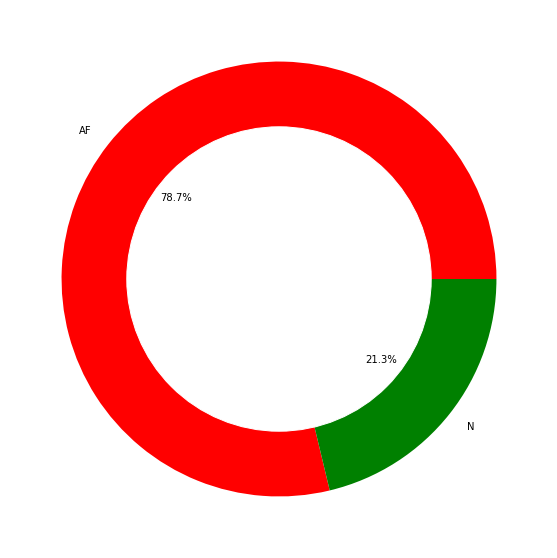

In [12]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, 
        labels=labels, 
        colors=['red','green'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

- kita akan membuat seluruh class memiliki jumlah sample sebanyak 20000. 
- Sehingga untuk class `0` yang memiliki sample 72471, akan dilakukan pemilihan acak sebanyak 20000 dengan menggunakan Pandas Dataframe `.sample()`.
- Untuk class lainya, karena dibawah 20000 sample, akan diterapkan proses upsampling menjadi 20000 sample menggunakan sklearn `resample()`.

In [13]:
# sampling and resampling dataset

from sklearn.utils import resample
n_samples = 400 
random_states = [42, 123]

dfs = []

for i in range(len(equilibre)):
    dfs.append(train_df[train_df[300]==i])
    if(equilibre[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

train_df=pd.concat(dfs)

In [14]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
478,0.658833,0.811685,0.915360,0.955959,0.940313,0.806133,0.463478,0.022840,-0.405291,-0.668952,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
258,0.920091,0.783382,0.422058,-0.017276,-0.457872,-0.655333,-0.504922,-0.209194,0.022361,0.294608,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
401,0.626725,0.286123,-0.158415,-0.531008,-0.655757,-0.459371,-0.198459,0.046396,0.267953,0.458972,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73,0.928876,0.729838,0.316991,-0.141110,-0.527243,-0.650846,-0.489954,-0.191187,0.040217,0.292345,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
488,0.746267,0.433362,0.016097,-0.423044,-0.719004,-0.438336,-0.186529,0.070887,0.306471,0.465261,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Sekarang kita memiliki dataset yang sudah balance.

In [15]:
# cek balanced dataset

equilibre=train_df[300].value_counts()

print(equilibre)

1    400
0    400
Name: 300, dtype: int64


## Understanding ECG Signal
- Sekarang kita ambil 1 sample tiap class untuk melihat profile heart beat masing-masing class.
- Ini berguna untuk kita agar dapat memahami karakteristik sinyal ECG untuk tiap class.
- Task ini mudah dilakukan menggunakan pandas,  `.groupby()` pada kolom 187 (kolom class) dan dengan menggunakan fungsi `.apply()` kita ambil 1 sample data menggunakan `.sample()`.

In [16]:
ECG_PER_CLASS =train_df.groupby(300,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [17]:
ECG_PER_CLASS

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
346,0.830382,0.590942,0.218423,-0.199273,-0.522916,-0.613260,-0.404332,-0.116070,0.075623,0.310152,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
174,0.901455,0.803944,0.588996,0.204794,-0.212958,-0.528555,-0.580409,-0.407338,-0.132165,0.096458,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


- Pertama kita plot tiap sample pada dataframe `ECG_PER_CLASS` menggunakan pandas `.plot()`.
- Setelah itu kita plot 2D histogram untuk keseluruhan sample ECG tiap class menggunakan fungsi `plot_hist()` yang kita buat dibawah.
- Pada plot histogram, daerah dengan intensitas lebih terang menandakan banyak titik sample pada waktu dan nilai ECG tersebut.
- Sebaliknya untuk daerah yang lebih gelap.

In [18]:
def plot_1_sample(class_number, fs=250):
    data = ECG_PER_CLASS.iloc[class_number,:300]
    times = np.arange(data.shape[0], dtype='float') / fs * 1000
    
    plt.plot(times, data)
    plt.title("Plot 1 sample in class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

In [19]:
def plot_hist(class_number, min_, size, fs=250):
    # filter data berdasarkan class_number 
    ECG=train_df.loc[train_df[300]==class_number].values
    
    # scale tm value (*1000) agar bisa ditampilkan dalam satuam (ms)
    tm = np.arange(ECG.shape[1], dtype='float') / fs * 1000
    
    # ambil data hanya pada kolom `min_` sampai `size`
    # convert ke 1D array
    ECG=ECG[:,min_:size]
    ECG_flatten=ECG.flatten()
    
    # generate time data untuk tiap kolom sample, 
    # ulang sebanyak ECG.shape[0]
    times = np.tile(tm[min_:size], ECG.shape[0]) 

    # plot sebagai 2D histogram
    plt.hist2d(times, ECG_flatten, bins=(80,80), cmap=plt.cm.jet)
    plt.title("2D histogram on class " + str(class_number))
    plt.xlabel("Time (ms)")
    plt.ylabel("Normalized Value")
    plt.show()

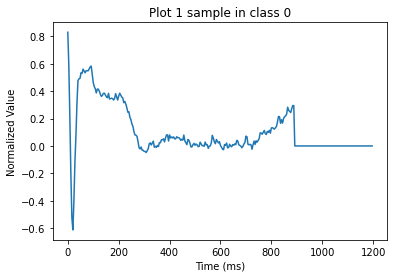

In [20]:
plot_1_sample(class_number=0)

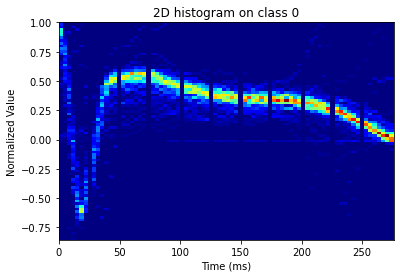

In [21]:
plot_hist(class_number=0, min_=0, size=70)

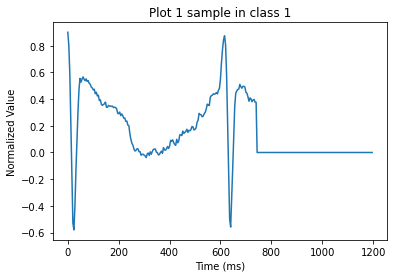

In [22]:
plot_1_sample(class_number=1)

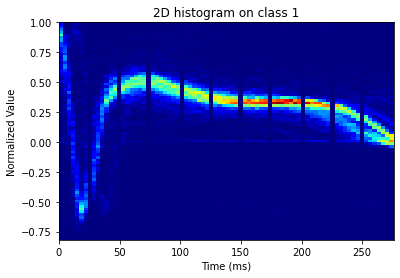

In [23]:
plot_hist(class_number=1, min_=0, size=70)

### Save Balanced Training Data and Test Data

In [24]:
train_df.to_csv(dataset_folder + "train_AFDB_%s_balanced.csv" % record, header=None, index=None)
test_df.to_csv(dataset_folder + "test_AFDB_%s.csv" % record, header=None, index=None)